# MNIST-Digit Recognizer CNN with GPU

## 1.0- GENERAL INFORMATION ABOUT DATA AND GPU

## Briefly explain MNIST and operation that u will do by using GPU. Also, Why are you using GPU rather than CPU.

MNIST dataset is consists of handwritten digits between 0 and 9. It is very popular and basic dataset for image classification. Easiness of this dataset makes it very approachable for beginners like me.

The CPU for training on deep learning is actually takes time if your model is complex. Also, CPU can be damaged if it exposure too much temperature. While the model is trained by CPU, long time is inevitable and temperate rise up naturally. Thus, the advantage of GPU has gave us with its parallel processing make our job easier than it should be with CPU. Hence, GPU is more better than CPU on these types of operations.

Firstly, lets look at our GPU is supported on our computer.

In [1]:
import tensorflow as tf
import warnings
if not tf.test.gpu_device_name():
    warnings.warn("No GPU found. Please ensure you have installed TensorFlow correctly")
else:
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [ ]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Now, we are ready to go.

## 2.0-PREPROCESSING

### Loading Libraries

In [3]:
import os
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time


### Loading Data

Location of data should be changed due to the data location on your local computer.

In [4]:

#import data 
train = pd.read_csv("C:/Users/User/Anaconda3/envs/tf_gpu/cnn_gpu/data/train.csv ")
test = pd.read_csv("C:/Users/User/Anaconda3/envs/tf_gpu/cnn_gpu/data/test.csv")


### Labelling

We will be focusing on our train set for our operations. 
* For our independent variables, we drop our **label** on train and to save with **X_train**. 
* For our dependent variable, we select **label** and save it with **Y_train**.

In [5]:
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
# put labels into y_train variable
Y_train = train["label"]

In [5]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train.nunique() # We have 10 classes which are in the range of 0-9 numbers

10

### Normalization

For making our job easier, we normalize our dataset with 255 which are the max value for an image.

In [6]:
# normalization with 255 because max value in image is 255

X_train = X_train/255.0
test = test / 255.0

### Reshape
 * Reshape all data to 28x28x1 3D matrices.
 * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

In [7]:
#Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### Label Encoding (One-Hot Encoding) 
* Labels are 10 digits numbers from 0 to 9

In [8]:
# One-Hot Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


### Visual Example

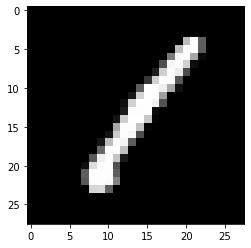

In [10]:
plt.imshow(X_train[0][:,:,0], cmap = "gray")
plt.show()

### Training and Validation Split

We will use validation set for looking our accuracy on training.

In [9]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state= 0)


We can save our dataset by using pickle if we need later on.

In [10]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("Y_val.pickle","wb")
pickle.dump(Y_val, pickle_out)
pickle_out.close()

## 3.0-MODELLING

## CNN

For our model, we will use CNN with keras which is a tensorflow backend. Also, we use **tensorboard** for demonstration of our models comparision. Hyper-parameter tuning is vital on CNN because deep learning is a **blackbox**. We do not know how CNN works deeply. Thus, one of the most important thing on AI is trying over and over again. I used very limited iteration for this operation.

### Model

In [13]:

dense_layers = [1,2]
layer_sizes = [64,128]
conv_layers = [1,2,3]

# after this loop shift the model under the NAME
for dense_layer in dense_layers: 
    for layer_size in layer_sizes:
         for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir = "logs\{}".format(NAME))
            model =  Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape = (28,28,1), padding = 'Same'))  
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size = (2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3), padding = 'Same'))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2)))
                model.add(Dropout(0.25))
                
            model.add(Flatten()) # converts ourr 3D feature maps to 1D feature vectors

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(10)) # output layer
            model.add(Activation("softmax"))

            model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
            model.fit(X_train, Y_train, batch_size = 32, epochs = 10, validation_data = (X_val, Y_val), callbacks = [tensorboard])


Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 188us/sample - loss: 0.1967 - acc: 0.9407 - val_loss: 0.0890 - val_acc: 0.9721
Epoch 2/10
33600/33600 [==============================] - 6s 183us/sample - loss: 0.0661 - acc: 0.9792 - val_loss: 0.0838 - val_acc: 0.9756
Epoch 3/10
33600/33600 [==============================] - 6s 180us/sample - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0742 - val_acc: 0.9761
Epoch 4/10
33600/33600 [==============================] - 6s 186us/sample - loss: 0.0289 - acc: 0.9911 - val_loss: 0.0604 - val_acc: 0.9827
Epoch 5/10
33600/33600 [==============================] - 6s 182us/sample - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0777 - val_acc: 0.9781
Epoch 6/10
33600/33600 [==============================] - 7s 199us/sample - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0683 - val_acc: 0.9810
Epoch 7/10
33600/33600 [==============================] - 6s 178us/sample - loss: 0.0109 - acc: 0.9966 - val_lo

33600/33600 [==============================] - 13s 373us/sample - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0455 - val_acc: 0.9860
Epoch 4/10
33600/33600 [==============================] - 13s 375us/sample - loss: 0.0422 - acc: 0.9870 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 5/10
33600/33600 [==============================] - 13s 374us/sample - loss: 0.0366 - acc: 0.9887 - val_loss: 0.0515 - val_acc: 0.9861
Epoch 6/10
33600/33600 [==============================] - 13s 377us/sample - loss: 0.0336 - acc: 0.9902 - val_loss: 0.0267 - val_acc: 0.9918
Epoch 7/10
33600/33600 [==============================] - 13s 374us/sample - loss: 0.0273 - acc: 0.9921 - val_loss: 0.0384 - val_acc: 0.9886
Epoch 8/10
33600/33600 [==============================] - 13s 373us/sample - loss: 0.0250 - acc: 0.9920 - val_loss: 0.0316 - val_acc: 0.9917
Epoch 9/10
33600/33600 [==============================] - 13s 377us/sample - loss: 0.0267 - acc: 0.9913 - val_loss: 0.0334 - val_acc: 0.9894
Epoch 10/10
33600/33600 

## 4.0- EVALUATION

In [38]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19592), started 1 day, 9:28:27 ago. (Use '!kill 19592' to kill it.)

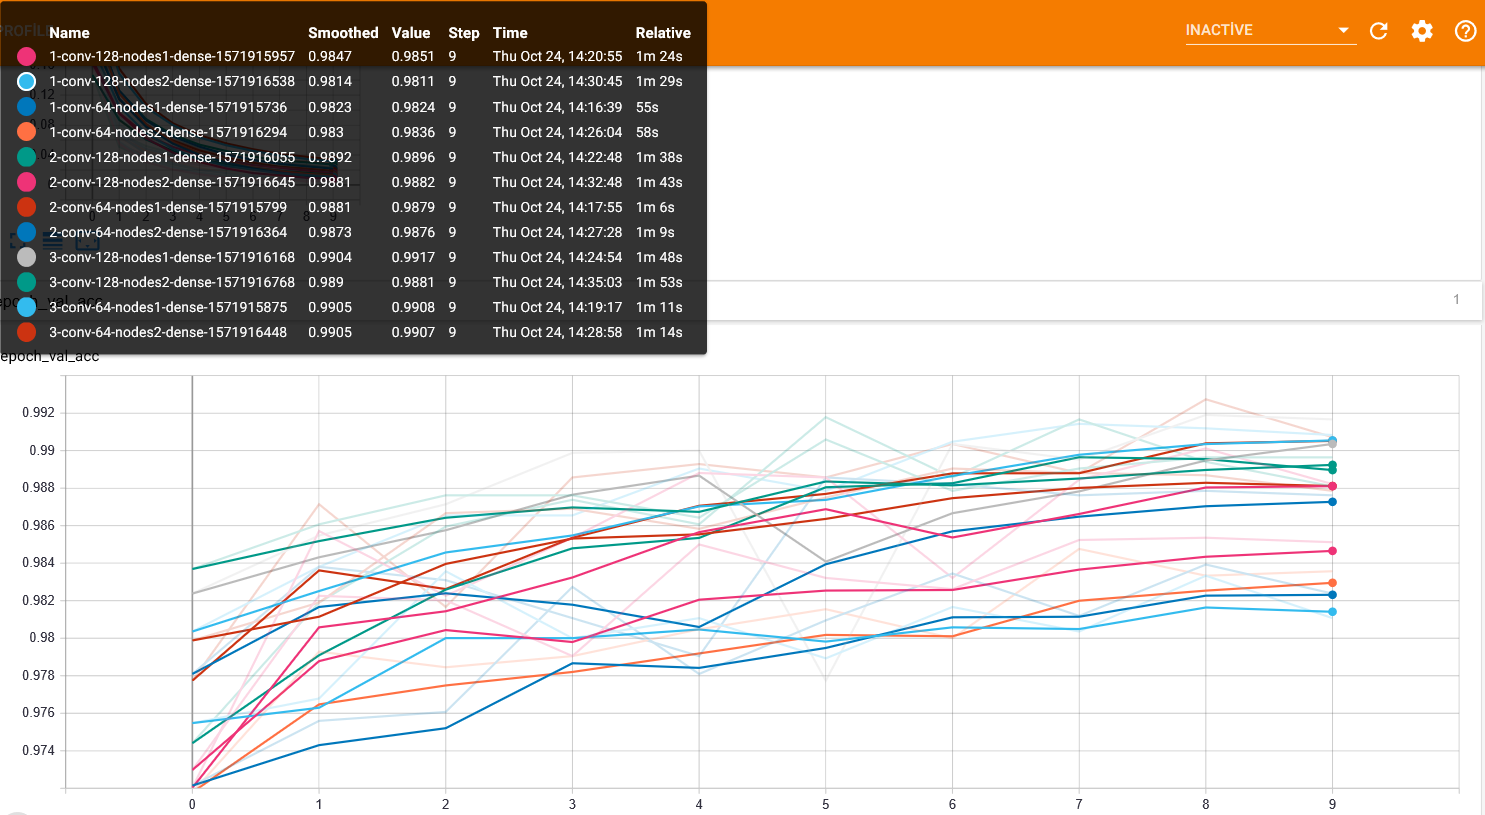

In [30]:
from IPython.display import Image
Image("val_acc.png")

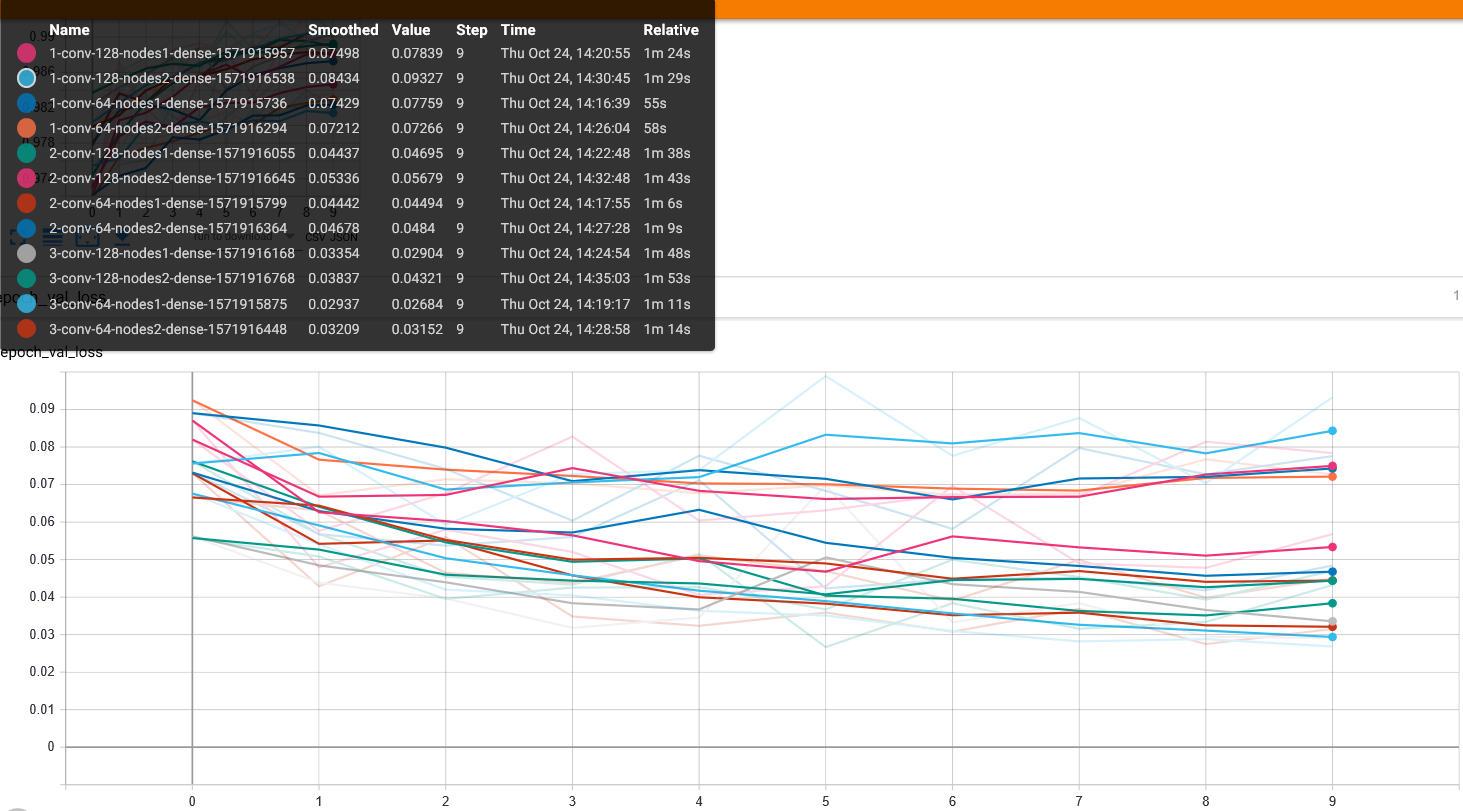

In [31]:

Image("val_loss.png")

When we looked at the TensorBoard for deciding the model, we can see there are three ways to look at it which are:
* Number of Conv. layer
* Number of nodes(neurons)
* Number of Dense layer

First of all, we have to look both epoch_acc and epoch_val_acc but simulatenously, because it can make our selection of model much easier. The reason this method is useful is that even the train accuracy is high, we can look at the validation set to confirm if this accuracy cause overfitting. We can also see some drastical change in validation more easily and think twice in model selection. 

For **number of Conv. layer**, we can select same number of nodes and number of Dense layer, then select our three conv. layers **1**,**2**,**3** for comparision. Then, we can clearly see that more number of conv. layer makes our accuracy in validation set. So that, we can decide for **number of conv. layer should be 3**.

For **number of nodes**, both **64** and **128** are changes in validation set rapidly even though we change both number of conv. layer and dense layer. However, **64** looks more stable and consistent rather than **128** to me. Thus, I picked **64 for number of nodes**.

For **number of Dense layer**, we can clearly see that **1** is more accuracy and stable than **2** in every cases on conv. layer and nodes. Hence, **number of dense layer should be 1**.   

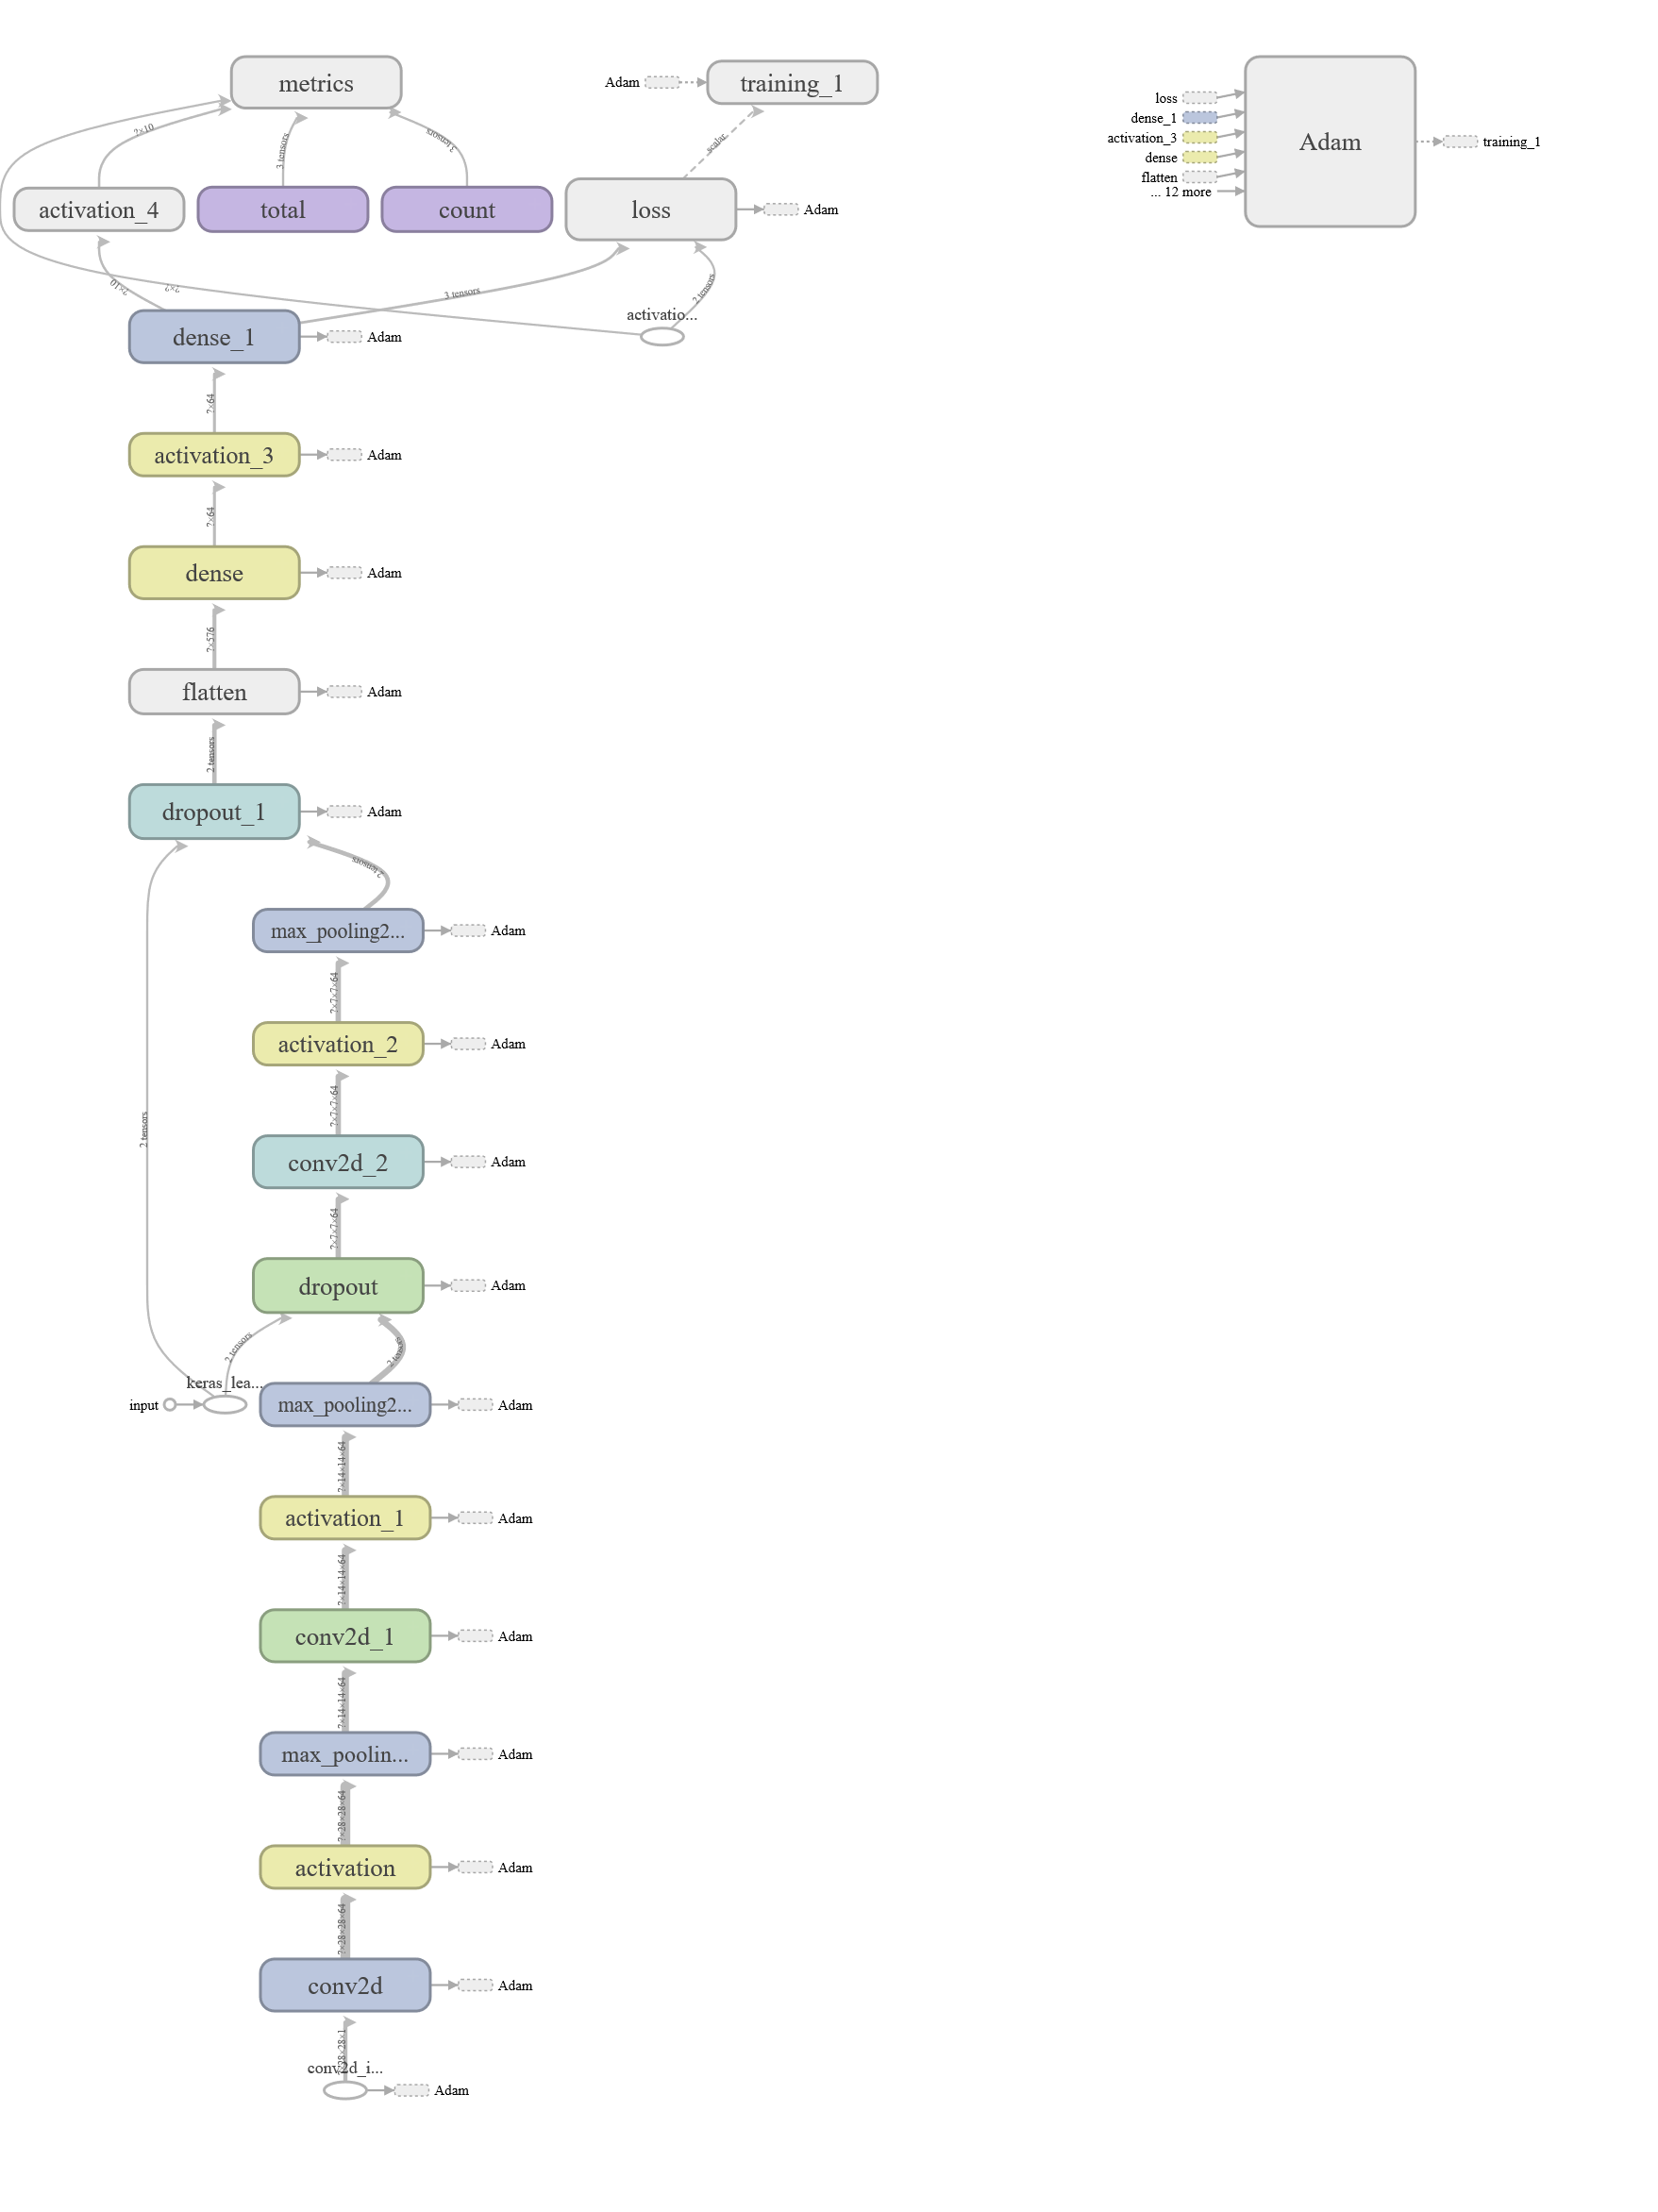

In [33]:
Image("3-conv-64-nodes1-dense-1571955873.png")

You can see our model in **Selected_Model**.